# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

65db361fbf8ed95471a60d7341e793f4


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL

units = "imperial"
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
Max_Temp = []
wind_speed = []
record_count_number = 1
print(f"Beginning Data Retrieval")
print(f"----------------------------------")
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
        weather_response = requests.get(query_url).json()
        #weather_json = weather_response.json()
        city_name.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        Max_Temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        time.sleep(1.01)
    
        print(f"Processing Record {record_count_number} | {city}")
        record_count_number = record_count_number + 1
    except:  print("City not found.  Skipping ... ")
print(f"--------------------------------")
print(f"Data Retrieval Complete")
print(f"--------------------------------")

Beginning Data Retrieval
----------------------------------
Processing Record 1 | narsaq
Processing Record 2 | ostrovnoy
City not found.  Skipping ... 
Processing Record 3 | hokitika
Processing Record 4 | luderitz
Processing Record 5 | jumla
City not found.  Skipping ... 
Processing Record 6 | quang ngai
Processing Record 7 | kainan
Processing Record 8 | srandakan
Processing Record 9 | alofi
Processing Record 10 | bousso
Processing Record 11 | san patricio
Processing Record 12 | bluff
Processing Record 13 | muravlenko
Processing Record 14 | cape town
Processing Record 15 | pevek
Processing Record 16 | hilo
Processing Record 17 | punta arenas
Processing Record 18 | nador
Processing Record 19 | vaini
Processing Record 20 | ushuaia
Processing Record 21 | cidreira
Processing Record 22 | manaure
Processing Record 23 | new norfolk
Processing Record 24 | puerto ayora
Processing Record 25 | zhadovka
Processing Record 26 | imeni zhelyabova
Processing Record 27 | sao joao da barra
Processing Rec

Processing Record 227 | magnitka
Processing Record 228 | ghanzi
Processing Record 229 | faanui
Processing Record 230 | gazli
Processing Record 231 | yatou
Processing Record 232 | bilma
Processing Record 233 | halmstad
Processing Record 234 | peleduy
Processing Record 235 | awjilah
Processing Record 236 | elk city
Processing Record 237 | kalmunai
Processing Record 238 | lucapa
Processing Record 239 | adrar
Processing Record 240 | beitbridge
Processing Record 241 | khuzhir
Processing Record 242 | pangody
Processing Record 243 | saldanha
Processing Record 244 | parkes
Processing Record 245 | upernavik
Processing Record 246 | half moon bay
Processing Record 247 | braganca
Processing Record 248 | guayaramerin
Processing Record 249 | lalsk
Processing Record 250 | isangel
Processing Record 251 | zeya
Processing Record 252 | valparaiso
City not found.  Skipping ... 
Processing Record 253 | cherskiy
City not found.  Skipping ... 
Processing Record 254 | xining
Processing Record 255 | pauini
Pro

Processing Record 457 | khash
Processing Record 458 | college
City not found.  Skipping ... 
Processing Record 459 | siniscola
Processing Record 460 | ossora
Processing Record 461 | mokhsogollokh
Processing Record 462 | solnechnyy
Processing Record 463 | dakar
Processing Record 464 | catia la mar
Processing Record 465 | caluquembe
City not found.  Skipping ... 
Processing Record 466 | zaoyang
Processing Record 467 | ayni
Processing Record 468 | warrnambool
Processing Record 469 | karwar
Processing Record 470 | prieska
Processing Record 471 | tandil
Processing Record 472 | san andres
Processing Record 473 | nouadhibou
Processing Record 474 | simao
Processing Record 475 | tevaitoa
Processing Record 476 | vulcan
City not found.  Skipping ... 
Processing Record 477 | faya
Processing Record 478 | rio tuba
Processing Record 479 | jalu
Processing Record 480 | lorengau
Processing Record 481 | valdivia
Processing Record 482 | kon tum
Processing Record 483 | bellavista
Processing Record 484 | ne

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_report = pd.DataFrame({
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : Max_Temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
})

In [12]:
weather_report

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.92,-46.05,51.80,62,32,4.70,GL,1597882880
1,Ostrovnoy,68.05,39.51,49.24,78,46,10.18,RU,1597882864
2,Hokitika,-42.72,170.97,56.80,79,91,5.39,NZ,1597882925
3,Lüderitz,-26.65,15.16,60.40,31,0,9.33,NA,1597882929
4,Jumla,29.27,82.18,61.43,72,100,1.03,NP,1597882930
...,...,...,...,...,...,...,...,...,...
571,Tapes,-30.67,-51.40,49.44,77,0,10.54,BR,1597883633
572,Karakol,42.49,78.39,55.44,58,1,1.66,KG,1597883635
573,Khawhai,23.37,93.12,62.92,100,100,1.92,IN,1597883636
574,Spring Hill,28.48,-82.53,80.01,88,1,3.36,US,1597883610


In [52]:
import os
import csv
weather_report.to_csv("output_data/weather_report.csv", index=False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/weather_report.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
weather_report.loc[weather_report["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [3]:
#  Get the indices of cities that have humidity over 100%.


In [4]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [5]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

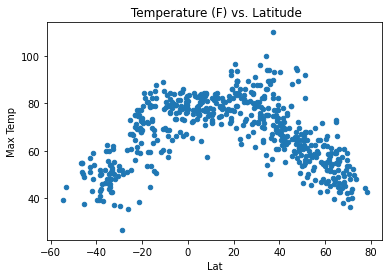

FileNotFoundError: [Errno 2] No such file or directory: '../Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_temp.png'

In [46]:
graph_lat_vs_temp = weather_report.plot(kind = "scatter", x = "Lat", y = "Max Temp", title = " Temperature (F) vs. Latitude")
plt.show()
fig = graph_lat_vs_temp.get_figure()
fig.savefig("../Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_temp.png")
print(f"The closer a city is to the equator, which is 0, the warmer it is.")
print(f"The closer a city is to either South pole or North pole, the colder the temperature is.")

## Latitude vs. Humidity Plot

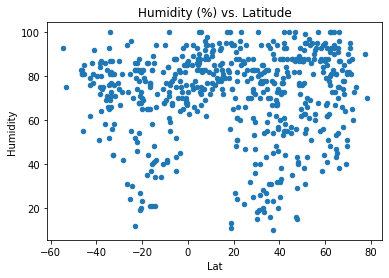

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_hum.png'

In [22]:
graph_lat_vs_hum = weather_report.plot(kind = "scatter", x = "Lat", y = "Humidity", title = "Humidity (%) vs. Latitude")
plt.show()
fig = graph_lat_vs_hum.get_figure()
fig.savefig("Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_hum.png")
print(f"Humidity varies across all latitudes; hence, there is no apparent correlation between latitude and humidity.")

## Latitude vs. Cloudiness Plot

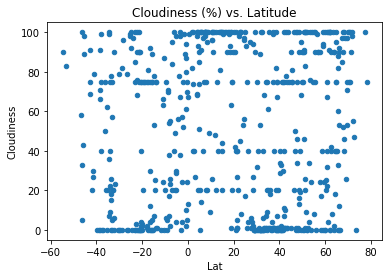

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_volkig.png'

In [23]:
graph_lat_vs_volkig = weather_report.plot(kind = "scatter", x = "Lat", y = "Cloudiness", title = "Cloudiness (%) vs. Latitude")
plt.show()
fig = graph_lat_vs_volkig.get_figure()
fig.savefig("Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_volkig.png")
print(f"There doesn't appear to be any correlation between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

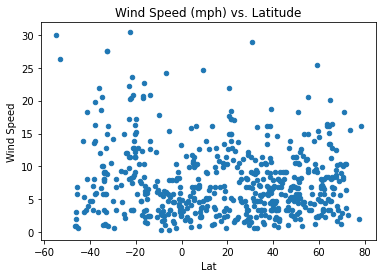

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_wind.png'

In [25]:
graph_lat_vs_wind = weather_report.plot(kind = "scatter", x = "Lat", y = "Wind Speed", title = "Wind Speed (mph) vs. Latitude")
plt.show()
fig = graph_lat_vs_wind.get_figure()
fig.savefig("Desktop/ucd-sac-data-pt-06-2020-u-c/06-Python-APIs/Homework/fig_lat_vs_wind.png")
print(f"There are a few outliers but most windy cities are farther away from the equator.")

## Linear Regression

In [6]:
# OPTIONAL: Create a function to create Linear Regression plots

In [26]:
# Create Northern and Southern Hemisphere DataFrames
#use loc to split dataframe into 2 parts, northern and southern hemispheres. 
north_df = weather_report.loc[weather_report["Lat"] >= 0]
south_df = weather_report.loc[weather_report["Lat"] < 0]      
print(north_df)
print(south_df)

            City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0         Narsaq  60.92  -46.05     51.80        62          32        4.70   
1      Ostrovnoy  68.05   39.51     49.24        78          46       10.18   
4          Jumla  29.27   82.18     61.43        72         100        1.03   
5     Quang Ngai  15.12  108.80     78.12        81         100        2.46   
6         Kainan  34.15  135.20     86.00        83          75        4.70   
..           ...    ...     ...       ...       ...         ...         ...   
570       Kolpny  52.23   37.04     61.09        66         100       12.57   
572      Karakol  42.49   78.39     55.44        58           1        1.66   
573      Khawhai  23.37   93.12     62.92       100         100        1.92   
574  Spring Hill  28.48  -82.53     80.01        88           1        3.36   
575       Ixtapa  20.70 -105.20     84.20        70          90        3.36   

    Country        Date  
0        GL  1597882880  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
def creategraph(df, x_axis, y_axis, title):
    
    from scipy.stats import linregress

    (slope, intercept, rvalue, pvalue, stderr) = linregress(
        df[x_axis], df[y_axis])
    regress_values = df[x_axis] * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(df[x_axis],df[y_axis])
    plt.plot(df[x_axis],regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")

    plt.show()

The r-squared is: 0.5221102309066061


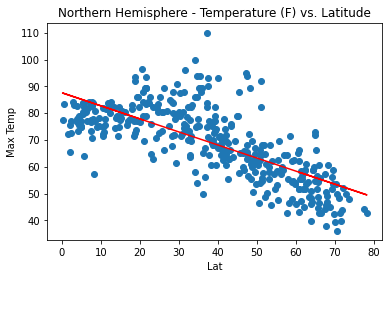

In [29]:
creategraph(df= north_df, x_axis ="Lat", y_axis = "Max Temp", title = "Northern Hemisphere - Temperature (F) vs. Latitude" )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5898443244858812


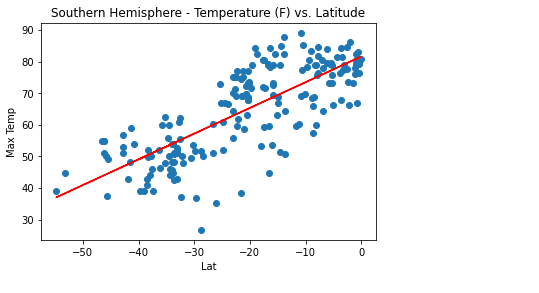

In [30]:
creategraph(df= south_df, x_axis ="Lat", y_axis = "Max Temp", title = "Southern Hemisphere - Temperature (F) vs. Latitude" )

In [31]:
print(f"Cities located closer to the equator have warmer high temperatures.")

Cities located closer to the equator have warmer high temperatures.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0034226949003955194


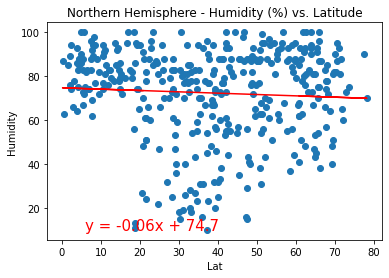

In [32]:

creategraph(df= north_df, x_axis ="Lat", y_axis = "Humidity", title = "Northern Hemisphere - Humidity (%) vs. Latitude" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009018059210682213


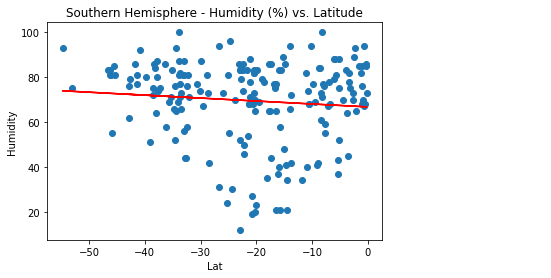

In [35]:
creategraph(df= south_df, x_axis ="Lat", y_axis = "Humidity", title = "Southern Hemisphere - Humidity (%) vs. Latitude" )

In [36]:
print(f"Based on the r-squared and slope of the regression lines, there does NOT seem to be any relationship")
print(f"between latitude and percent humidity.")

Based on the r-squared and slope of the regression lines, there does NOT seem to be any relationship
between latitude and percent humidity.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0060515801298131324


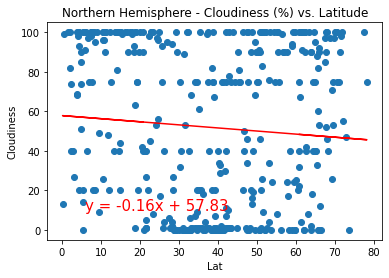

In [37]:
creategraph(df= north_df, x_axis ="Lat", y_axis = "Cloudiness", title = "Northern Hemisphere - Cloudiness (%) vs. Latitude" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00014793963799588638


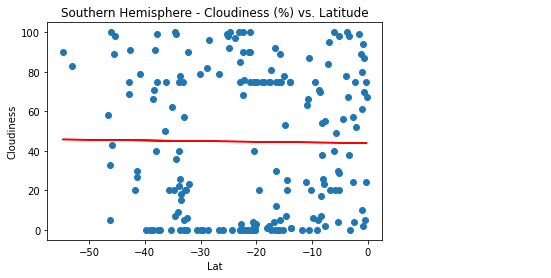

In [38]:
creategraph(df= south_df, x_axis ="Lat", y_axis = "Cloudiness", title = "Southern Hemisphere - Cloudiness (%) vs. Latitude" )

In [39]:
print(f"The r-squared values are very close to zero and slopes of the regression lines are essentially zero.")
print(f"There is no statistical relationship or correlation between cloudiness and latitude.")

The r-squared values are very close to zero and slopes of the regression lines are essentially zero.
There is no statistical relationship or correlation between cloudiness and latitude.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0020222936087350416


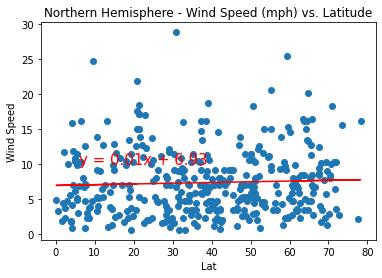

In [40]:
creategraph(df= north_df, x_axis ="Lat", y_axis = "Wind Speed", title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.049980253992177676


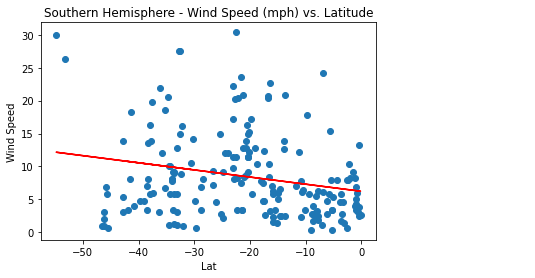

In [41]:
creategraph(df= south_df, x_axis ="Lat", y_axis = "Wind Speed", title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude" )

In [42]:
print(f"Most of the collected cities have wind speed under 15 mph.  Few have wind speeds exceeding 25 mph.")

Most of the collected cities have wind speed under 15 mph.  Few have wind speeds exceeding 25 mph.
